In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [29]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [30]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [31]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [44]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [45]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [46]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [47]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [48]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_9/BiasAdd:0' shape=(4, 3) dtype=float32>

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)

In [50]:
session.run(tf.global_variables_initializer())

In [51]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [52]:
print (y_true.shape)

(?, 3)


In [53]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        pred_list += session.run(output_layer,feed_dict=feed_dict_train)

In [54]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [56]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.5087984


ValueError: operands could not be broadcast together with shapes (0,) (4,3) 

In [19]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [20]:
#print (session.run(output_layer))

In [21]:
#print (session.run(cost))

In [22]:
#print (rmse_a)

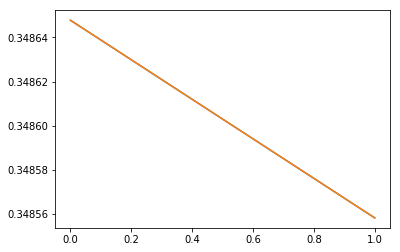

In [23]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [24]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [25]:
print (rmse_a)

[0.3486478, 0.34855816]


In [26]:
print (rmse_a[-1])

0.34855816
